<a href="https://colab.research.google.com/github/dianaquinterol/MujeresDigitales/blob/main/ProyectoNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diana Soraya Quintero Lopez

In [15]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as sfm
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df= pd.read_csv("pbp-2021.csv")

In [4]:
df.describe

<bound method NDFrame.describe of            GameId    GameDate  Quarter  ...  IsNoPlay  PenaltyType PenaltyYards
0      2021103112  2021-10-31        3  ...         0          NaN            0
1      2021103112  2021-10-31        3  ...         0          NaN            0
2      2021103112  2021-10-31        3  ...         0          NaN            0
3      2021103112  2021-10-31        3  ...         0          NaN            0
4      2021103112  2021-10-31        3  ...         0          NaN            0
...           ...         ...      ...  ...       ...          ...          ...
21878  2021091204  2021-09-12        4  ...         0          NaN            0
21879  2021091202  2021-09-12        1  ...         0          NaN            0
21880  2021090900  2021-09-09        3  ...         0          NaN            0
21881  2021090900  2021-09-09        2  ...         0          NaN            0
21882  2021090900  2021-09-09        1  ...         0          NaN            0

[2188

In [5]:
df.shape

(21883, 45)

In [6]:
df["GameId"].unique().shape

(122,)

In [7]:
df.describe

<bound method NDFrame.describe of            GameId    GameDate  Quarter  ...  IsNoPlay  PenaltyType PenaltyYards
0      2021103112  2021-10-31        3  ...         0          NaN            0
1      2021103112  2021-10-31        3  ...         0          NaN            0
2      2021103112  2021-10-31        3  ...         0          NaN            0
3      2021103112  2021-10-31        3  ...         0          NaN            0
4      2021103112  2021-10-31        3  ...         0          NaN            0
...           ...         ...      ...  ...       ...          ...          ...
21878  2021091204  2021-09-12        4  ...         0          NaN            0
21879  2021091202  2021-09-12        1  ...         0          NaN            0
21880  2021090900  2021-09-09        3  ...         0          NaN            0
21881  2021090900  2021-09-09        2  ...         0          NaN            0
21882  2021090900  2021-09-09        1  ...         0          NaN            0

[2188

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21883 entries, 0 to 21882
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          21883 non-null  int64  
 1   GameDate                        21883 non-null  object 
 2   Quarter                         21883 non-null  int64  
 3   Minute                          21883 non-null  int64  
 4   Second                          21883 non-null  int64  
 5   OffenseTeam                     19965 non-null  object 
 6   DefenseTeam                     19965 non-null  object 
 7   Down                            21883 non-null  int64  
 8   ToGo                            21883 non-null  int64  
 9   YardLine                        21883 non-null  int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 21883 non-null  int64  
 12  Unnamed: 12                     

In [9]:
df["OffenseTeam"].unique()

array(['MIN', 'DAL', nan, 'KC', 'NYG', 'JAX', 'SEA', 'NE', 'LAC', 'NO',
       'CIN', 'NYJ', 'WAS', 'DEN', 'TB', 'LA', 'HOU', 'PIT', 'CLE', 'IND',
       'TEN', 'DET', 'PHI', 'MIA', 'SF', 'BUF', 'CHI', 'GB', 'ARI', 'LV',
       'CAR', 'ATL', 'BAL'], dtype=object)

In [10]:
df["DefenseTeam"].unique()

array(['DAL', 'MIN', nan, 'NYG', 'KC', 'SEA', 'JAX', 'LAC', 'NE', 'TB',
       'NYJ', 'CIN', 'DEN', 'WAS', 'NO', 'HOU', 'LA', 'CLE', 'PIT', 'TEN',
       'IND', 'PHI', 'DET', 'BUF', 'CHI', 'MIA', 'SF', 'ARI', 'GB', 'LV',
       'ATL', 'CAR', 'BAL'], dtype=object)

In [160]:
game=df.iloc[ :, [0,1,5,6,14,21,25,36,42]]
game

,GameId,GameDate,OffenseTeam,DefenseTeam,Description,PlayType,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
0,2021103112,2021-10-31,MIN,DAL,"(6:36) 1-G.JOSEPH 40 YARD FIELD GOAL IS GOOD, ...",FIELD GOAL,0,0,0
1,2021103112,2021-10-31,MIN,DAL,(7:18) (SHOTGUN) 8-K.COUSINS PASS SHORT RIGHT ...,PASS,0,0,0
2,2021103112,2021-10-31,MIN,DAL,(7:23) 8-K.COUSINS PASS INCOMPLETE DEEP RIGHT ...,PASS,0,0,0
3,2021103112,2021-10-31,MIN,DAL,(7:59) 33-D.COOK RIGHT TACKLE TO DAL 29 FOR -2...,RUSH,0,0,0
4,2021103112,2021-10-31,MIN,DAL,(8:29) 8-K.COUSINS PASS SHORT RIGHT TO 89-C.HE...,PASS,0,0,0
...,...,...,...,...,...,...,...,...,...
21878,2021091204,2021-09-12,NaN,NaN,TIMEOUT #2 BY DET AT 00:58.,TIMEOUT,0,0,0
21879,2021091202,2021-09-12,NaN,NaN,END QUARTER 1,NaN,0,0,0
21880,2021090900,2021-09-09,NaN,NaN,END QUARTER 3,NaN,0,0,0
21881,2021090900,2021-09-09,NaN,NaN,END QUARTER 2,NaN,0,0,0


In [80]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21883 entries, 0 to 21882
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   GameId                          21883 non-null  int64 
 1   GameDate                        21883 non-null  object
 2   OffenseTeam                     19965 non-null  object
 3   DefenseTeam                     19965 non-null  object
 4   Description                     21883 non-null  object
 5   PlayType                        20871 non-null  object
 6   IsTouchdown                     21883 non-null  int64 
 7   IsTwoPointConversionSuccessful  21883 non-null  int64 
 8   IsNoPlay                        21883 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.5+ MB


In [195]:
game.describe()

,GameId,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
count,2.188300e+04,21883.000000,21883.000000,21883.000000
mean,2.021098e+09,0.032628,0.001919,0.053238
std,4.958073e+03,0.177665,0.043769,0.224512
min,2.021091e+09,0.000000,0.000000,0.000000
25%,2.021092e+09,0.000000,0.000000,0.000000
50%,2.021100e+09,0.000000,0.000000,0.000000
75%,2.021102e+09,0.000000,0.000000,0.000000
max,2.021110e+09,1.000000,1.000000,1.000000


In [196]:
game.fillna(0)

,GameId,GameDate,OffenseTeam,DefenseTeam,Description,PlayType,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
0,2021103112,2021-10-31,MIN,DAL,"(6:36) 1-G.JOSEPH 40 YARD FIELD GOAL IS GOOD, ...",FIELD GOAL,0,0,0
1,2021103112,2021-10-31,MIN,DAL,(7:18) (SHOTGUN) 8-K.COUSINS PASS SHORT RIGHT ...,PASS,0,0,0
2,2021103112,2021-10-31,MIN,DAL,(7:23) 8-K.COUSINS PASS INCOMPLETE DEEP RIGHT ...,PASS,0,0,0
3,2021103112,2021-10-31,MIN,DAL,(7:59) 33-D.COOK RIGHT TACKLE TO DAL 29 FOR -2...,RUSH,0,0,0
4,2021103112,2021-10-31,MIN,DAL,(8:29) 8-K.COUSINS PASS SHORT RIGHT TO 89-C.HE...,PASS,0,0,0
...,...,...,...,...,...,...,...,...,...
21878,2021091204,2021-09-12,0,0,TIMEOUT #2 BY DET AT 00:58.,TIMEOUT,0,0,0
21879,2021091202,2021-09-12,0,0,END QUARTER 1,0,0,0,0
21880,2021090900,2021-09-09,0,0,END QUARTER 3,0,0,0,0
21881,2021090900,2021-09-09,0,0,END QUARTER 2,0,0,0,0


In [ ]:
                    ##identifica Cada Juego 
 1   GameDate                        fecha del juego
 2   OffenseTeam                     Equipo Local
 3   DefenseTeam                     Equipo Visitante
 4   Description                     Descricion de las Jugadas
 5   PlayType                        Tipo de Jugada
 6   IsTouchdown                     Anotación en el fútbol americano 
 7   IsTwoPointConversionSuccessful  Anotación de 2 puntos
 8   IsNoPlay                        Decide si es punto valido o no

In [192]:
game.groupby('GameId').sum()

,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
GameId,,,
2021090900,7,0,15
2021091200,5,1,21
2021091201,3,0,12
2021091202,4,1,11
2021091203,6,0,14
...,...,...,...
2021103109,5,0,12
2021103110,3,0,7
2021103111,8,0,10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

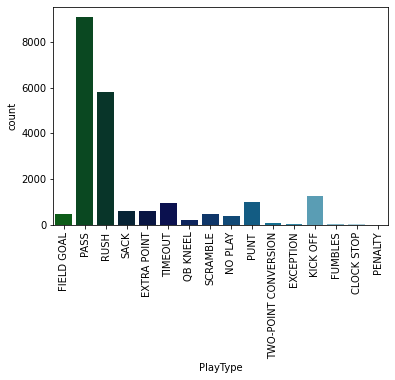

In [216]:
sns.countplot(game['PlayType'], palette= 'ocean')
plt.xticks(rotation= 90)

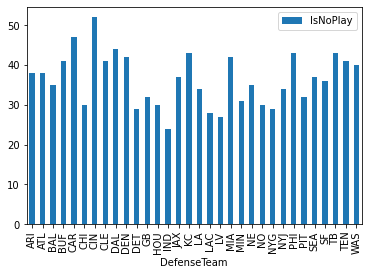

In [249]:
game.groupby("DefenseTeam")["IsNoPlay"].sum().plot(kind='bar', legend='Reverse')

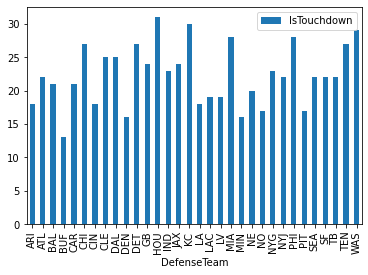

In [251]:
game.groupby("DefenseTeam")["IsTouchdown"].sum().plot(kind='bar', legend='Reverse')

In [ ]:
game.groupby("DefenseTeam")["IsNoPlay"].sum().plot(kind='bar', legend='Reverse')

In [237]:
game.groupby('DefenseTeam').sum()


,GameId,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
DefenseTeam,,,,
ARI,1238932974413,18,0,38
ATL,1184363097306,22,3,38
BAL,1131814376805,21,0,35
BUF,1069160574533,13,1,41
CAR,1273292039155,21,3,47
CHI,1255101932150,27,1,30
CIN,1416789056352,18,2,52
CLE,1259144231358,25,3,41
DAL,1127772314537,25,2,44


In [138]:
x = pd.concat([(game['IsTwoPointConversionSuccessful']-game['IsTwoPointConversionSuccessful'].mean()) / game['IsTwoPointConversionSuccessful'].std(),
               (game['IsNoPlay']-game['IsNoPlay'].mean()) / game['IsNoPlay'].std(),
               pd.get_dummies(game['OffenseTeam'], drop_first=True),
               pd.get_dummies(game['DefenseTeam'], drop_first=True),
               pd.get_dummies(game['PlayType'], drop_first=True)
               ], axis =1)
x.head()

,IsTwoPointConversionSuccessful,IsNoPlay,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,DET,GB,HOU,IND,JAX,KC,LA,LAC,LV,MIA,MIN,NE,NO,NYG,NYJ,PHI,PIT,SEA,SF,TB,TEN,WAS,EXCEPTION,EXTRA POINT,FIELD GOAL,FUMBLES,KICK OFF,NO PLAY,PASS,PENALTY,PUNT,QB KNEEL,RUSH,SACK,SCRAMBLE,TIMEOUT,TWO-POINT CONVERSION
0,-0.043851,-0.237126,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.043851,-0.237126,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-0.043851,-0.237126,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-0.043851,-0.237126,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.043851,-0.237126,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [121]:
y = pd.get_dummies(game['IsTouchdown'], drop_first=True)
y

,1
0,0
1,0
2,0
3,0
4,0
...,...
21878,0
21879,0
21880,0
21881,0


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [123]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [124]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [125]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [126]:
lo_pred = logit.predict(x_test)
precision_score(y_test, lo_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [127]:
precision_score(y_test, rf.predict(x_test))

0.0

In [128]:
precision_score(y_test, knn.predict(x_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

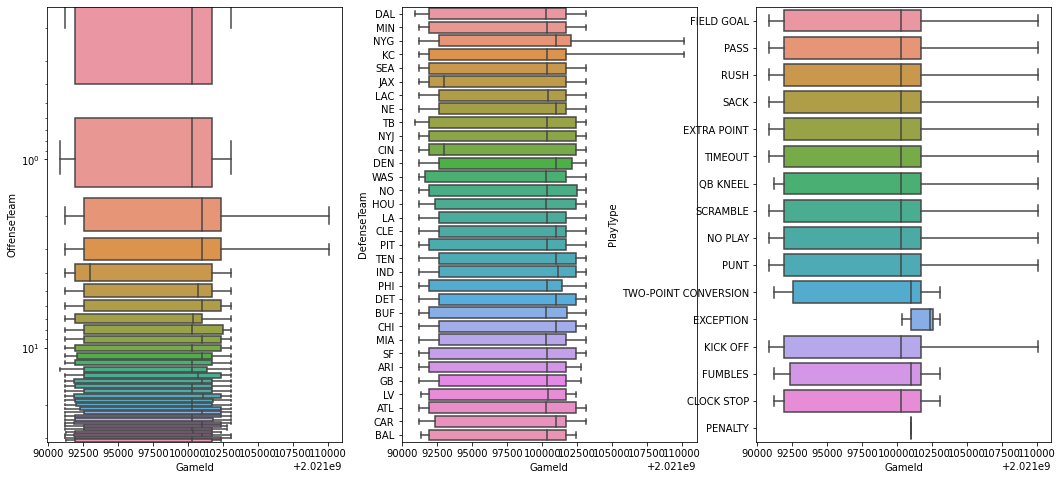

In [223]:
fig, ax=plt.subplots(1,3, figsize=(18,8))
sns.boxplot(y='OffenseTeam', x='GameId', data=game, ax=ax[0]).set_yscale('log')
sns.boxplot(y='DefenseTeam', x ='GameId', data = game, ax=ax[1])
sns.boxplot(y='PlayType', x='GameId', data=game, ax=ax[2])

(array([8586.,  157.,    0.,    0., 2735., 7520., 2702.,    0.,    0.,
         183.]),
 array([2.02109090e+09, 2.02109282e+09, 2.02109474e+09, 2.02109666e+09,
        2.02109858e+09, 2.02110050e+09, 2.02110242e+09, 2.02110434e+09,
        2.02110626e+09, 2.02110818e+09, 2.02111010e+09]),
 <a list of 10 Patch objects>)

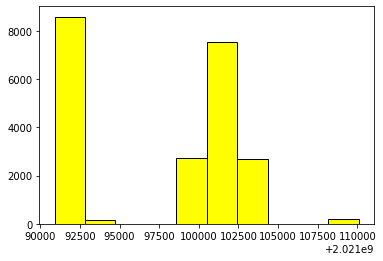

In [228]:
plt.hist(game['GameId'], 10,color='yellow', ec='black' )

In [ ]:
game1=game[(game["IsTouchdown"] == 1 ) & (game["IsNoPlay"]== 0)]
game1

,GameId,GameDate,OffenseTeam,DefenseTeam,Description,PlayType,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
27,2021110100,2021-11-01,NYG,KC,(14:57) (SHOTGUN) 8-D.JONES PASS SHORT RIGHT T...,PASS,1,0,0
55,2021103112,2021-10-31,DAL,MIN,(:55) (SHOTGUN) 10-C.RUSH PASS SHORT LEFT TO 1...,PASS,1,0,0
95,2021103109,2021-10-31,SEA,JAX,"(4:22) 7-G.SMITH UP THE MIDDLE FOR 1 YARD, TOU...",RUSH,1,0,0
119,2021103108,2021-10-31,LAC,NE,(:47) (SHOTGUN) 10-J.HERBERT PASS DEEP RIGHT T...,PASS,1,0,0
148,2021103108,2021-10-31,NE,LAC,(10:51) 37-D.HARRIS UP THE MIDDLE FOR 28 YARDS...,RUSH,1,0,0
...,...,...,...,...,...,...,...,...,...
21566,2021103112,2021-10-31,DAL,MIN,(14:18) (SHOTGUN) 10-C.RUSH PASS DEEP MIDDLE T...,PASS,1,0,0
21653,2021101707,2021-10-17,KC,WAS,(14:08) 31-DA.WILLIAMS UP THE MIDDLE FOR 3 YAR...,RUSH,1,0,0
21671,2021101706,2021-10-17,NYG,LA,(6:27) (NO HUDDLE) 39-E.PENNY UP THE MIDDLE FO...,RUSH,1,0,0
21715,2021101009,2021-10-10,CLE,LAC,"(4:51) 27-K.HUNT RIGHT END FOR 8 YARDS, TOUCHD...",RUSH,1,0,0


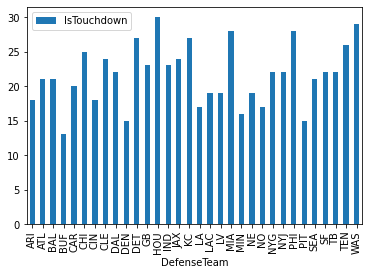

In [ ]:
game1.groupby("DefenseTeam")["IsTouchdown"].count().plot(kind='bar', legend='Reverse')

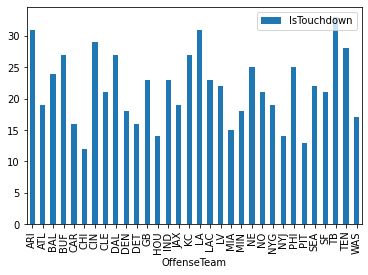

In [ ]:
game1.groupby("OffenseTeam",)["IsTouchdown"].count().plot(kind='bar', legend='Reverse')

In [ ]:
GameId

In [ ]:
GameId=df["GameId"].values
fieldgoal=game1['PlayType'].values
IsTouchdown=game2['IsTouchdown'].values
Twopoint=game3['IsTwoPointConversionSuccessful'].values

